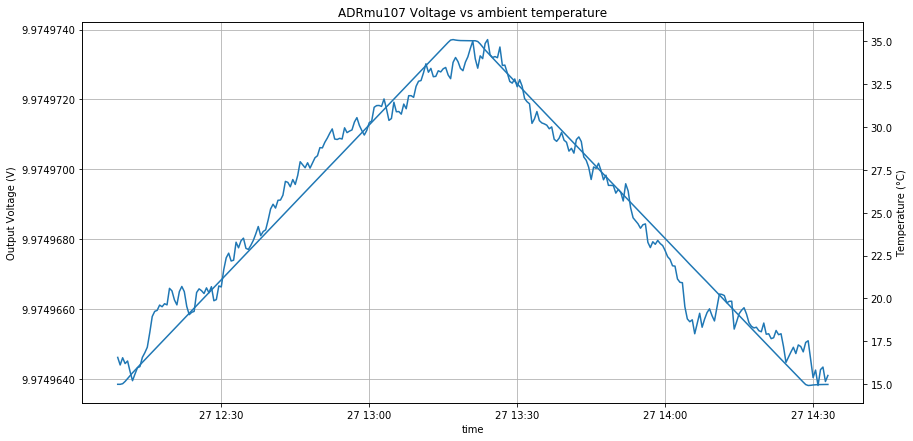

In a sweep between 14.92873333333333°C and 35.08326666666666°C
with a speed of roughly 16.795444444444442°C per hour
we see a voltage tempco of roughly 0.049120462560428936 ppm/k


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Fetch data
columns = ["Time", "Arroyo TECSource Chamber Temp", "3458A Vz"]
raw=pd.read_csv("https://raw.githubusercontent.com/marcoreps/multiinstrumentalist/master/csv/20230127-120917_ADRmu107_15_35_TC_sweep.csv", usecols=columns)

# Use datetime as index
raw["Time"] = pd.to_datetime(raw["Time"])
raw = raw.set_index(pd.DatetimeIndex(raw["Time"]))
raw = raw.drop('Time', axis=1)

raw=raw.resample('30s').mean()
plt.rcParams["figure.figsize"] = [14, 7]
fig, ax = plt.subplots()
twin1 = ax.twinx()
twin1.set_ylabel("Temperature (°C)")
ax.grid()
ax.set(xlabel='time', ylabel='Output Voltage (V)', title='ADRmu107 Voltage vs ambient temperature')
ax.plot(raw.iloc[:,1])
twin1.plot(raw.iloc[:,0])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.7f'))
plt.show()
print("In a sweep between "+str(raw["Arroyo TECSource Chamber Temp"].min())+"°C and "+str(raw["Arroyo TECSource Chamber Temp"].max())+"°C")
time_range=(raw.index.max() - raw.index.min()).total_seconds()
temperature_range=raw["Arroyo TECSource Chamber Temp"].max()-raw["Arroyo TECSource Chamber Temp"].min()
voltage_range=raw["3458A Vz"].max()-raw["3458A Vz"].min()
print("with a speed of roughly "+str(temperature_range/(time_range/3600)*2)+"°C per hour")
print("we see a voltage tempco of roughly "+str((voltage_range/.00001)/temperature_range)+" ppm/k")